Importing libraries

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#setup matplot's deafults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


In [3]:
#import data preprocessing libraries
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [7]:
#import feature engineering libraries
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
import category_encoders as ce


In [8]:
#import model libraries
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [8]:
#import metric evaliation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve

In [9]:
import os

In [17]:
import warnings
warnings.filterwarnings('ignore')

Downloading data:
Data was downloaded using Kaggle Api
kaggle competitions download -c house-prices-advanced-regression-techniques
After that datasets where unzipped to further use

In [41]:
#loading train and test dataset
train = pd.read_csv('train.csv', index_col = 'Id')
test = pd.read_csv('test.csv', index_col = 'Id')

In [42]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Data visualisation
The best way to get some insights of what is going on in a dataset is to make a data visualisation

In [39]:
train.shape


(1460, 80)

In [40]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


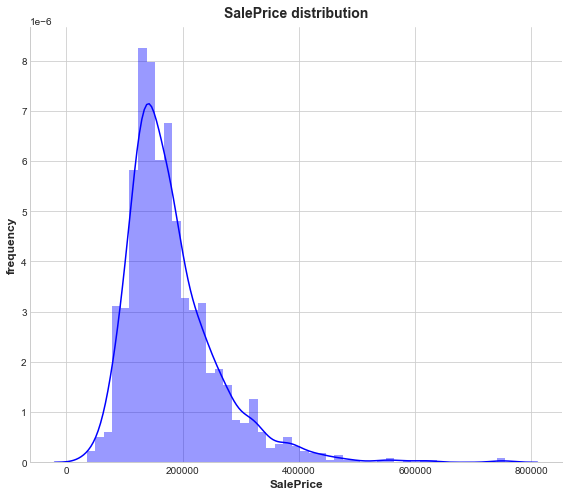

In [37]:
#Let's see how is SalePrice distributed
plt.figure(figsize = (8,7))
dist = sns.distplot(train['SalePrice'],color = 'blue',kde = True)
dist.set(title = "SalePrice distribution",xlabel = 'SalePrice',ylabel = 'frequency')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine()
plt.show()

The distribution figure shows that SalePrice is not normaly distributed and will require further standardize.

Now lets see the correlation with each data and the SalePrice

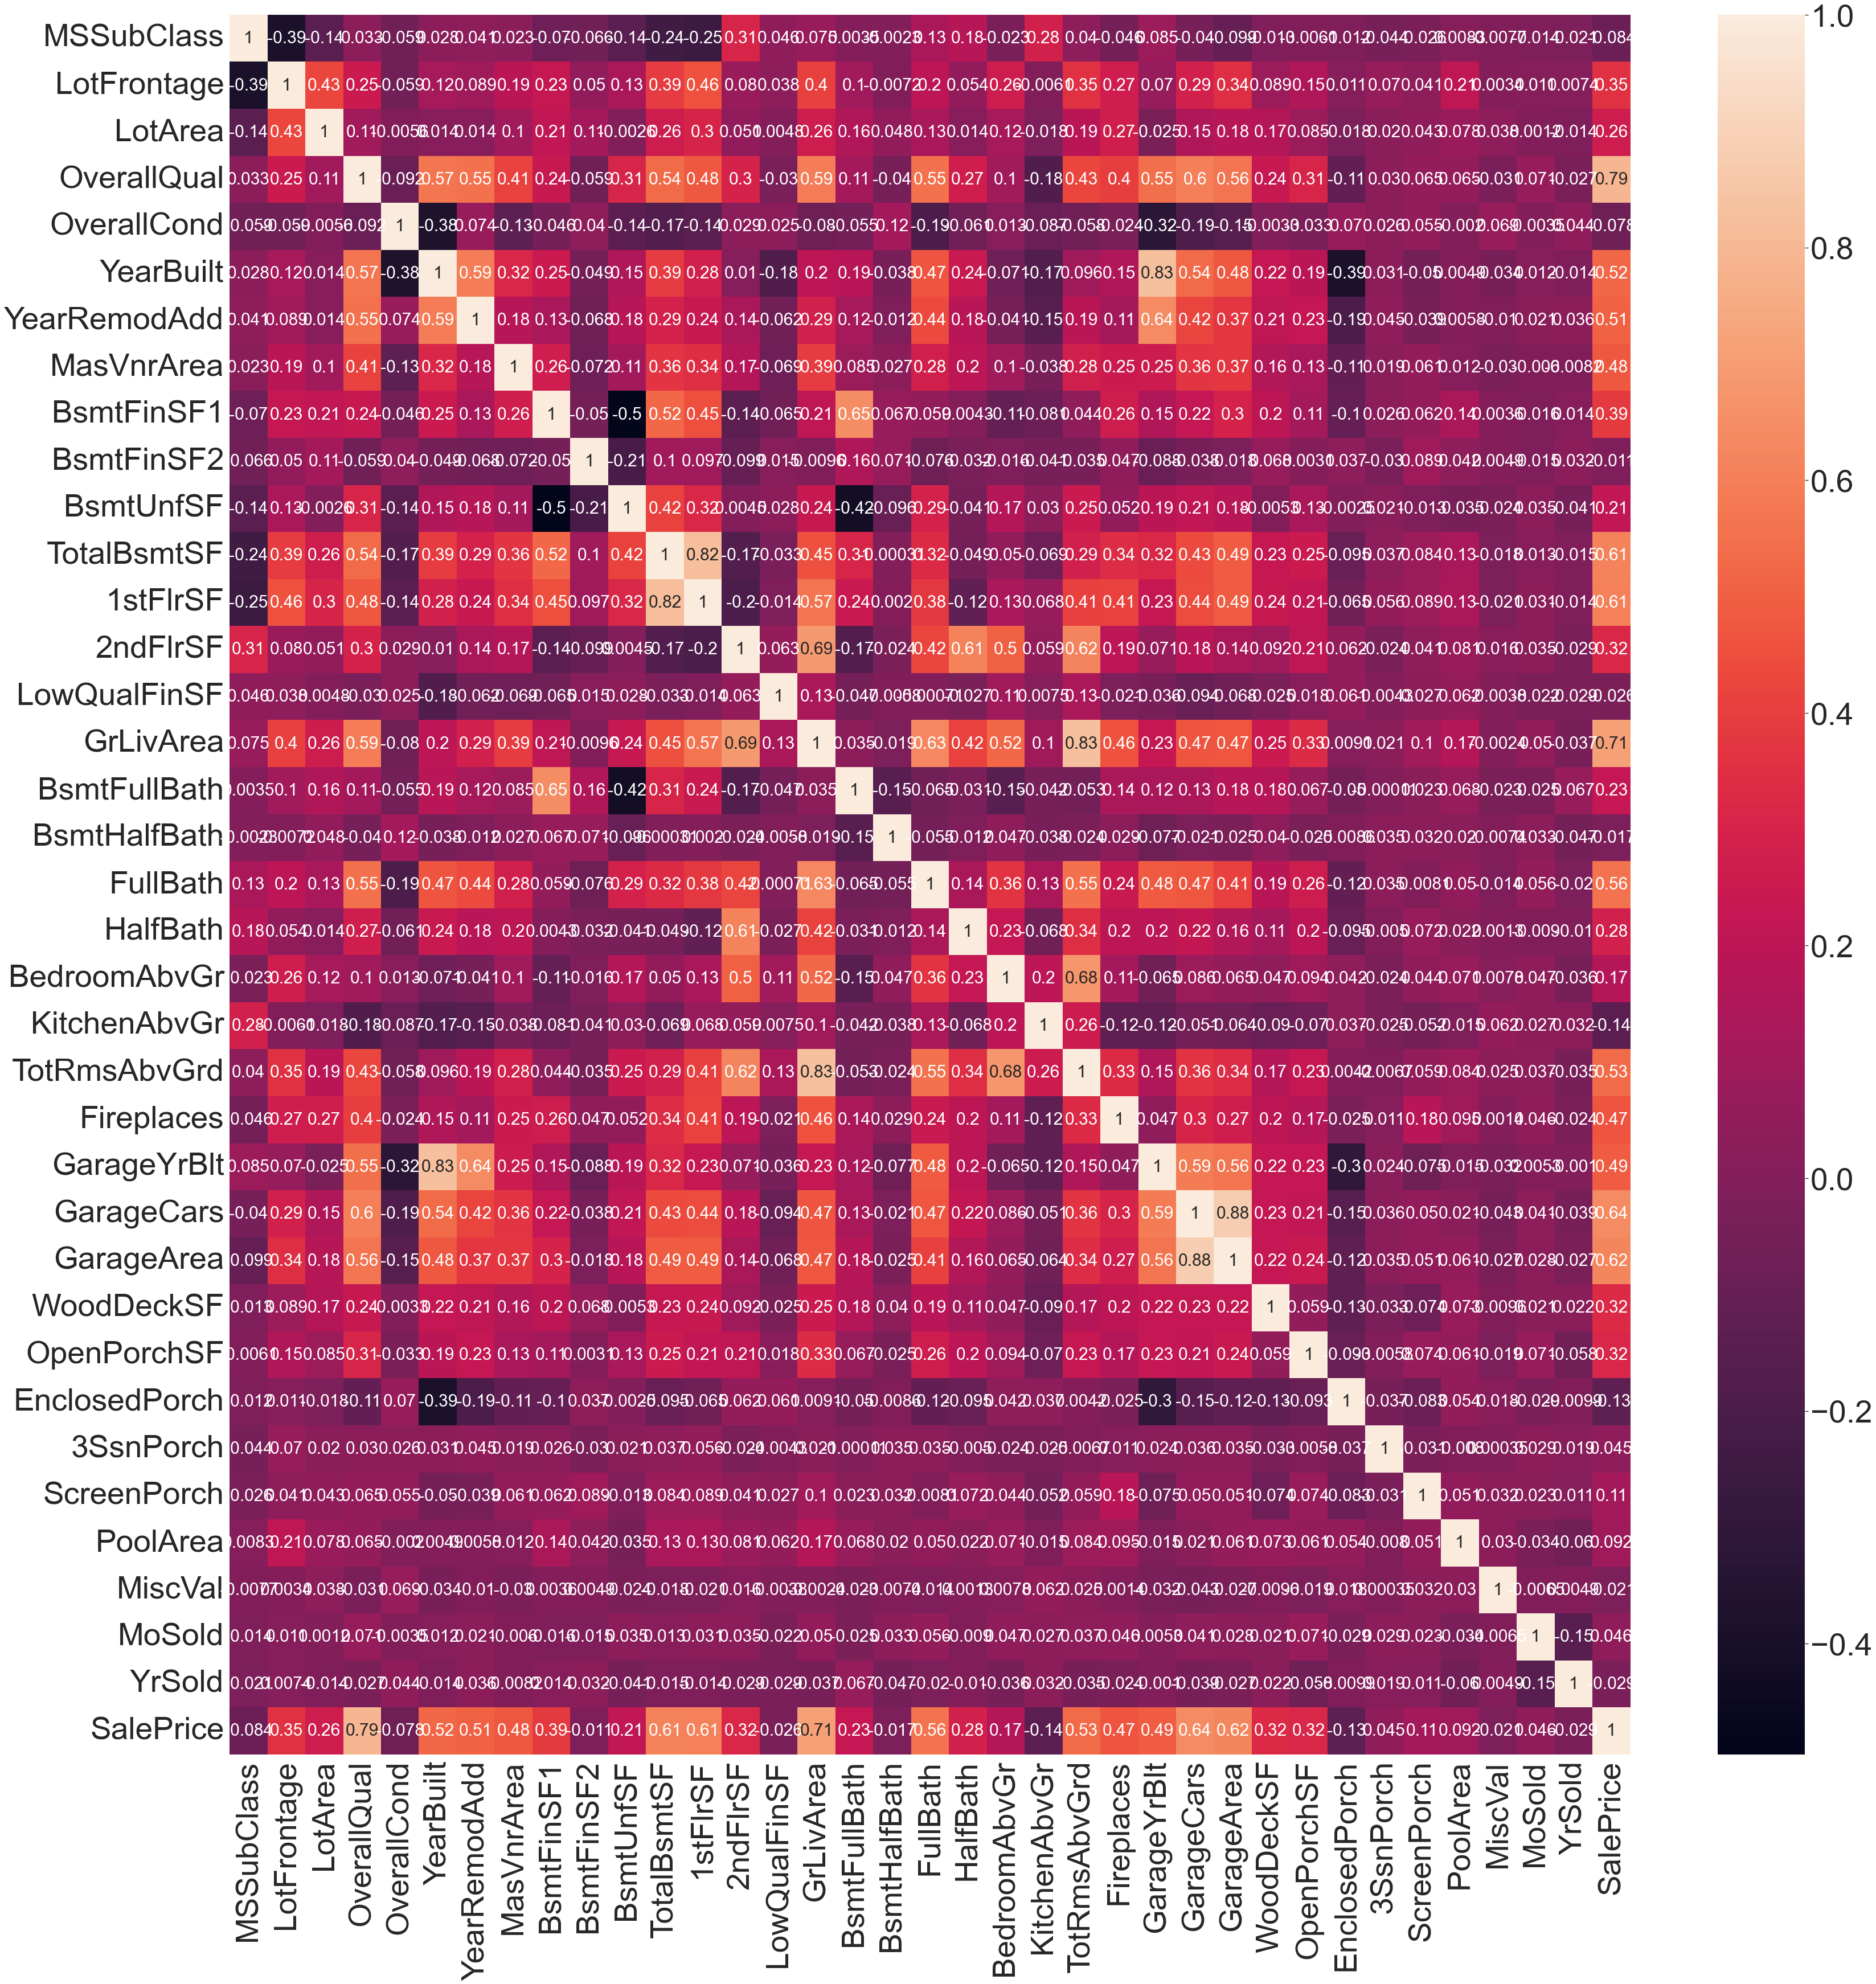

In [104]:
plt.figure(figsize = (50,50))

corr = train.corr()
sns.set(font_scale = 5)
sns.heatmap(corr,annot = True,annot_kws={"size": 30})
plt.show()


10 Highest correlation with SalePrice:
OverallQual - 0.79 - Rates the overall material and finish of the house
GrLivArea - 0.71 - Above grade (ground) living area square feet
GarageCars - 0.64 - Size of garage in car capacity
GarageArea - 0.62 - Size of garage in square feet
Total BsmtSF  - 0.61 - Total square feet of basement area
1stFlrSf - 0.61 - First Floor square feet
FullBath - 0.56 - Full bathrooms above grade
TotRmsAbvGrd - 0.53 - Total rooms above grade (does not include bathrooms)
YearBuild - 0.52 - Original construction date
YearRemodAdd - 0.51 - Remodel date (same as construction date if no remodeling or additions)

/In addition to above/
In the furher part of work, features like GarageCars & GarageArea that are highly correlated which each other,
will be careful examined in terms of feature engineering


Now lets plot those values in order to see if there are some obvious outliners

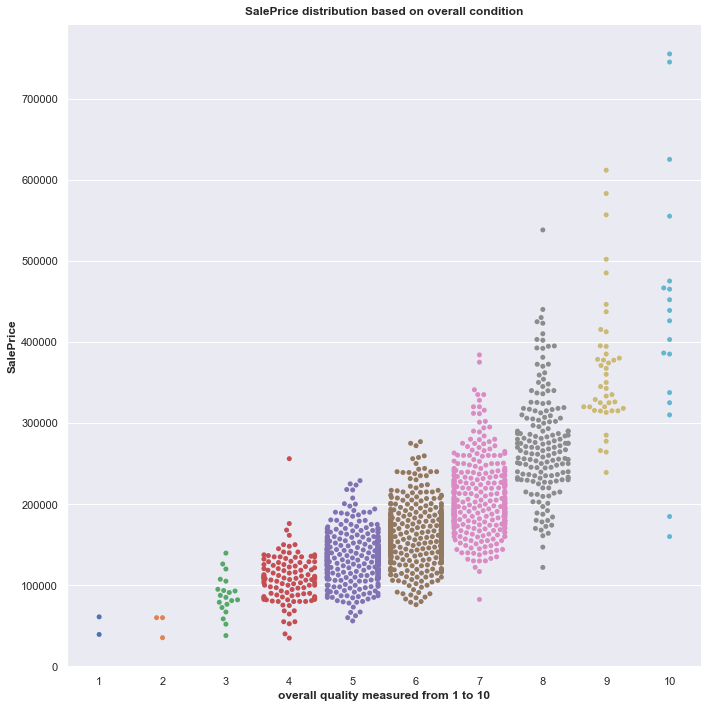

In [105]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
qual = sns.swarmplot(x = train['OverallQual'],y=train['SalePrice'])
qual.set(title = "SalePrice distribution based on overall condition",xlabel = 'overall quality measured from 1 to 10')
sns.despine()
plt.show()

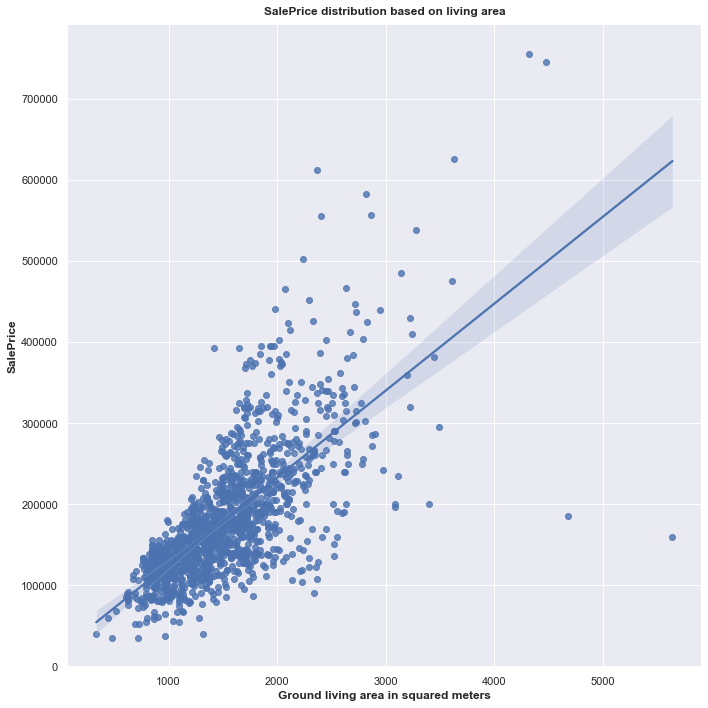

In [106]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
liv_area = sns.regplot(x = train['GrLivArea'], y = train['SalePrice'])
liv_area.set(title = 'SalePrice distribution based on living area',xlabel = 'Ground living area in squared feet')
sns.despine()
plt.show()

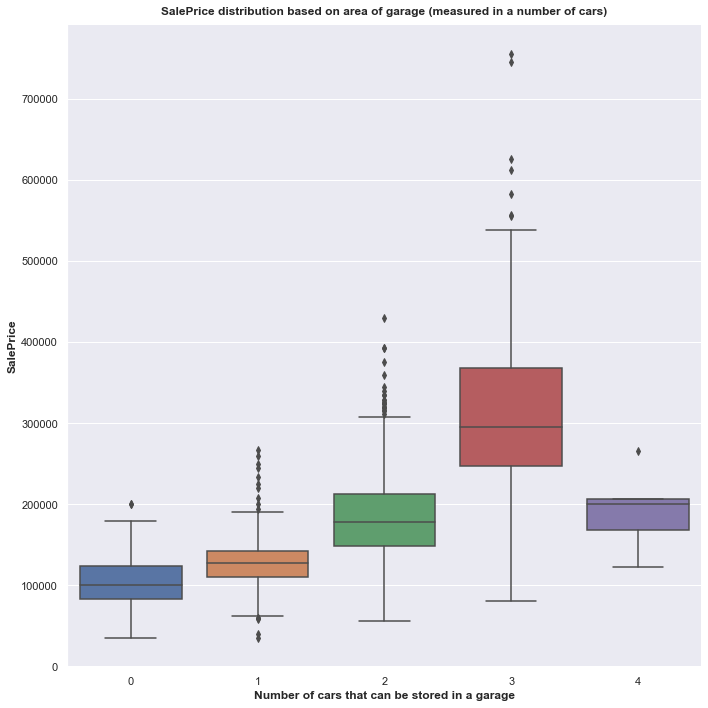

In [107]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
garage_cars = sns.boxplot(x = train['GarageCars'], y = train['SalePrice'])
garage_cars.set(title = 'SalePrice distribution based on area of garage (measured in a number of cars)',xlabel = 'Number of cars that can be stored in a garage')
sns.despine()
plt.show()

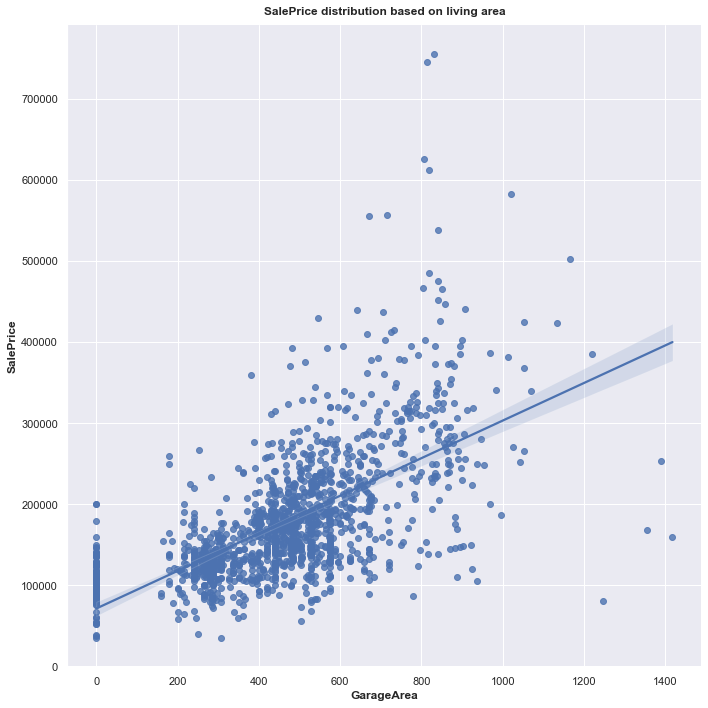

In [86]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
gar_area = sns.regplot(x = train['GarageArea'], y = train['SalePrice'])
gar_area.set(title = 'SalePrice distribution based on garage area in sqared feet',xlabel = 'Garage area in squared feet' )
sns.despine()
plt.show()

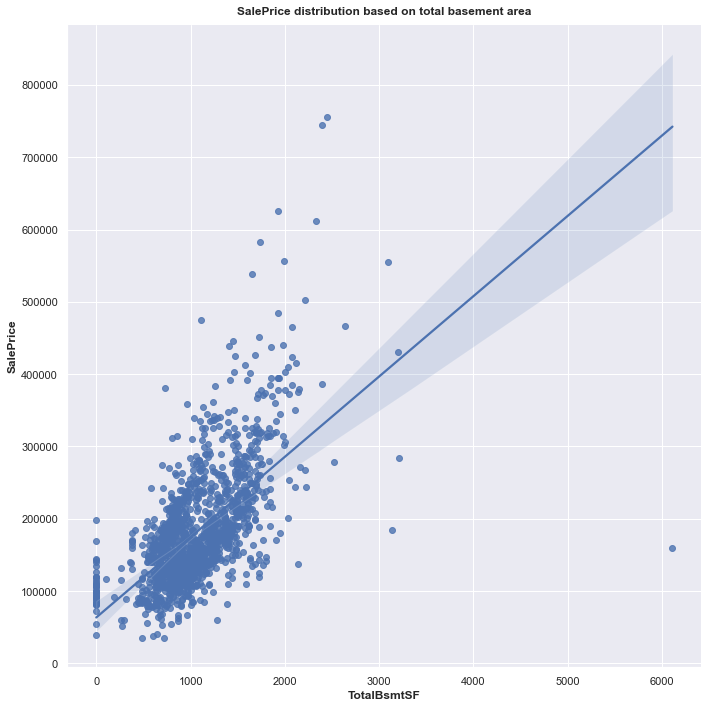

In [90]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
bsmt_area = sns.regplot(x = train['TotalBsmtSF'], y = train['SalePrice'])
bsmt_area.set(title = 'SalePrice distribution based on total basement area',xlabel = 'basement area in squared feet')
sns.despine()
plt.show()

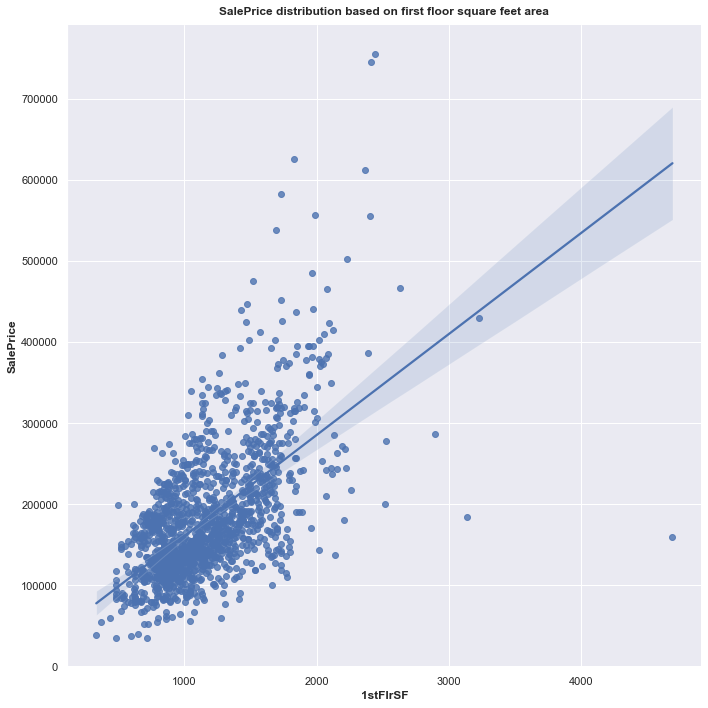

In [95]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
liv_area = sns.regplot(x = train['1stFlrSF'], y = train['SalePrice'])
liv_area.set(title = 'SalePrice distribution based on first floor square feet area')
sns.despine()
plt.show()

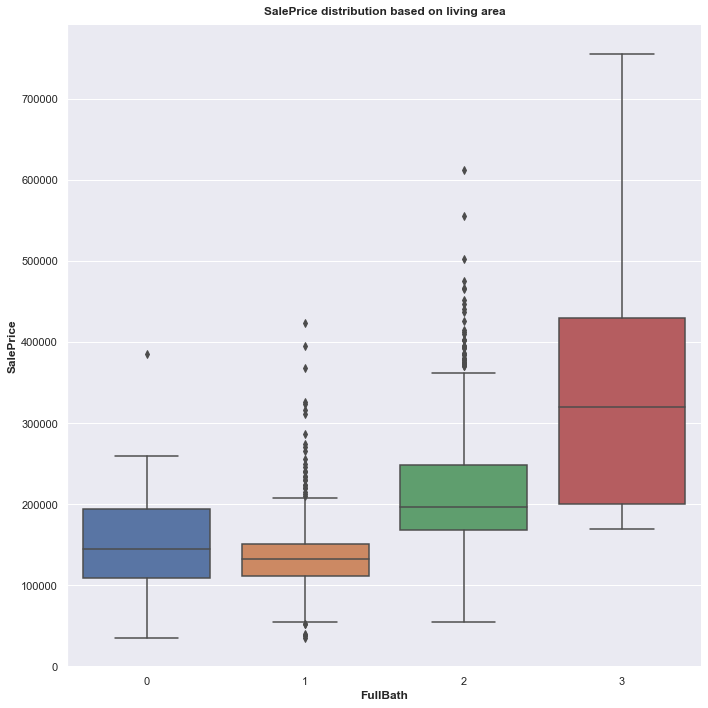

In [97]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
liv_area = sns.boxplot(x = train['FullBath'], y = train['SalePrice'])
liv_area.set(title = 'SalePrice distribution based on bathroom number')
sns.despine()
plt.show()

In [100]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
    "LotFrontage"
]

print("Correlation with SalePrice:\n")
print(train[features].corrwith(train.SalePrice))


Correlation with SalePrice:

GarageArea      0.623431
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
GrLivArea       0.708624
LotFrontage     0.351799
dtype: float64


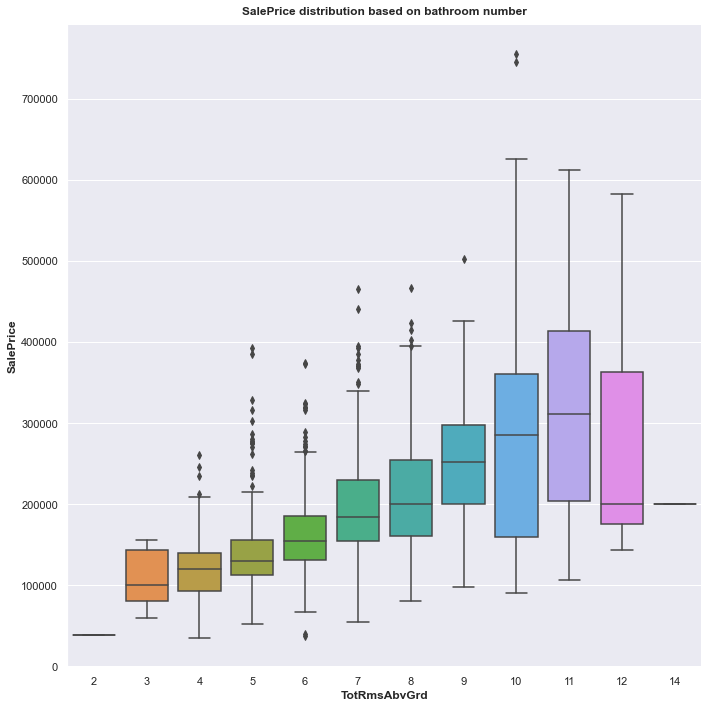

In [103]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
liv_area = sns.boxplot(x = train['TotRmsAbvGrd'], y = train['SalePrice'])
liv_area.set(title = 'SalePrice distribution based on bathroom number')
sns.despine()
plt.show()